In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("powerplant_data.csv")

In [3]:
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
# AT ->  TEMPERATURE
# V -> VACUUM
# AP -> PRESSURE
# RH -> HUMIDITY

# PE -> PRODUCED ENERGY

In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
X = df.drop("PE" ,axis=1)
y = df["PE"]

In [6]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

In [8]:
# Split the data 

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)


In [9]:
X_train

,AT,V,AP,RH
5487,25.24,63.47,1011.30,66.21
3522,26.09,70.40,1007.41,85.37
6916,26.63,73.68,1015.15,85.13
7544,32.06,71.85,1007.90,56.44
7600,28.70,71.64,1007.11,69.85
...,...,...,...,...
5734,26.25,61.02,1011.47,71.22
5191,29.17,64.79,1016.43,61.05
5390,18.00,43.70,1015.40,61.28
860,26.73,68.84,1010.75,66.83


In [11]:
X_test

,AT,V,AP,RH
2513,29.70,57.35,1005.63,57.35
9411,25.71,71.64,1008.85,77.31
8745,17.83,44.92,1025.04,70.58
9085,9.46,41.40,1026.78,87.58
4950,29.90,64.79,1016.90,48.24
...,...,...,...,...
7204,20.46,51.43,1010.06,83.79
1599,29.70,67.17,1007.31,66.56
5697,14.64,39.58,1011.46,71.90
350,29.47,71.32,1008.07,67.00


In [12]:
df.shape

(9568, 5)

In [13]:
# Scale the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[ 0.74805289,  0.72006931, -0.32660017, -0.49711722],
       [ 0.86181948,  1.26515721, -0.98521113,  0.8181501 ],
       [ 0.93409473,  1.52314975,  0.32523844,  0.80167494],
       ...,
       [-0.22097078, -0.834965  ,  0.36756563, -0.83554456],
       [ 0.94747903,  1.14245344, -0.41971997, -0.45455637],
       [-1.77355014, -1.19049131,  1.92520594,  0.91837402]])

In [15]:
X_test_scaled

array([[ 1.34499288,  0.23869298, -1.28658067, -1.10532538],
       [ 0.81095912,  1.36269098, -0.74140656,  0.26485915],
       [-0.2437241 , -0.73900436,  1.99970178, -0.19713193],
       ...,
       [-0.67068342, -1.15902881, -0.29951077, -0.10651852],
       [ 1.31420898,  1.33752097, -0.87346737, -0.44288647],
       [-0.2611237 , -0.27021304,  0.37433797,  1.10646548]])

In [16]:
import torch 
import torch.nn as nn

X_train_tensor = torch.tensor(X_train_scaled ,dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values ,dtype = torch.float32).view(-1,1)

X_test_tensor = torch.tensor(X_test_scaled ,dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values ,dtype = torch.float32).view(-1,1)



In [17]:
type(X_train_scaled)

numpy.ndarray

In [18]:
type(y_train)
y_train.shape

(7654,)

In [19]:
y_train

5487    442.75
3522    432.52
6916    428.80
7544    426.07
7600    436.58
         ...  
5734    436.44
5191    441.20
5390    464.26
860     440.45
7270    484.44
Name: PE, Length: 7654, dtype: float64

In [20]:
from torch.utils.data import TensorDataset , DataLoader

train_dataset = TensorDataset(X_train_tensor ,y_train_tensor)
test_dataset = TensorDataset(X_test_tensor ,y_test_tensor)

In [61]:
train_loader =DataLoader(train_dataset ,batch_size=32 ,shuffle=True)
test_loader =DataLoader(test_dataset ,batch_size=32 )

#### Deep Learning

In [74]:
# Define our Ann Model

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.model = nn.Sequential(
         # 1st hidden layer
         nn.Linear(X_train.shape[1],6),
         nn.ReLU(),

          # 2st hidden layer
         nn.Linear(6,6),
         nn.ReLU(),

         # output layer
         nn.Linear(6,1),
     )

       

    def forward(self, x):
         return self.model(x)
        

In [75]:
import torch.optim as optim

model =ANN()

crietrion =nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [76]:
# train the ANN

train_losses = []
val_losses = []

best_val_loss = float("inf")

epochs = 100

for epoch in range(epochs):

    model.train()

    running_loss = 0.0  # total training loss for 1 epoch

    for xb, yb in train_loader:
           # xb - input feature of 1 batch
        # yb - output feature of 1 batch

        optimizer.zero_grad()

        outputs = model(xb)                 # forward propagation
        loss = crietrion(outputs, yb)      # compute loss

        loss.backward()                    # backpropagation compute gradients

        optimizer.step()                   # update weights

        running_loss += loss.item() # loss is tensor value we convert in python float



    epoch_train_loss = running_loss / len(train_loader)

    train_losses.append(epoch_train_loss)


    # -------- VALIDATION --------

    model.eval()

    running_val_loss = 0.0


    with torch.no_grad(): # no gradients compute


        for xb, yb in test_loader:

            outputs = model(xb)

            loss = crietrion(outputs, yb)

            running_val_loss += loss.item()


    epoch_val_loss = running_val_loss / len(test_loader)

    val_losses.append(epoch_val_loss)


    print(f"Epoch {epoch+1}/{epochs} ==> Training Loss = {epoch_train_loss:.4f}, Validation Loss = {epoch_val_loss:.4f}")

    if epoch_val_loss < best_val_loss:
        best_val_loss =epoch_val_loss
        torch.save(model.state_dict() ,"best_model.pt") # .pt or .pth

Epoch 1/100 ==> Training Loss = 204876.8923, Validation Loss = 201404.1979
Epoch 2/100 ==> Training Loss = 191028.7548, Validation Loss = 175118.0229
Epoch 3/100 ==> Training Loss = 149886.7976, Validation Loss = 120643.3504
Epoch 4/100 ==> Training Loss = 90360.1931, Validation Loss = 62724.4079
Epoch 5/100 ==> Training Loss = 43593.8848, Validation Loss = 30144.5892
Epoch 6/100 ==> Training Loss = 22592.5703, Validation Loss = 17956.2885
Epoch 7/100 ==> Training Loss = 14730.2359, Validation Loss = 12821.7966
Epoch 8/100 ==> Training Loss = 10978.6515, Validation Loss = 9761.6857
Epoch 9/100 ==> Training Loss = 8380.1348, Validation Loss = 7438.3331
Epoch 10/100 ==> Training Loss = 6336.6141, Validation Loss = 5605.3313
Epoch 11/100 ==> Training Loss = 4745.9800, Validation Loss = 4203.9013
Epoch 12/100 ==> Training Loss = 3534.1479, Validation Loss = 3112.4281
Epoch 13/100 ==> Training Loss = 2578.9418, Validation Loss = 2274.8635
Epoch 14/100 ==> Training Loss = 1867.9372, Validati

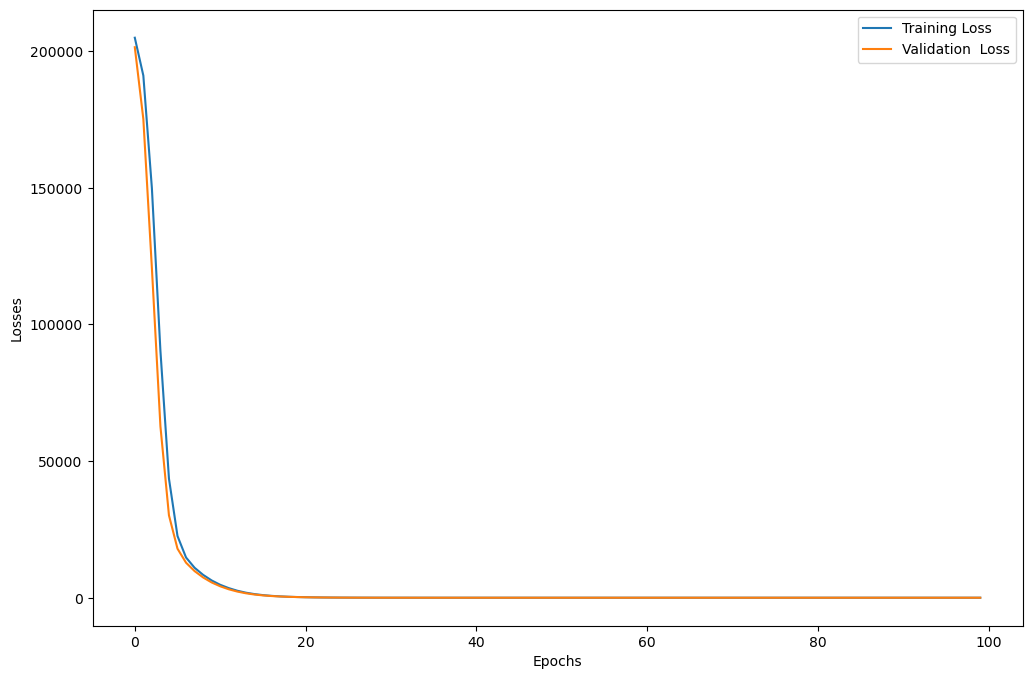

In [77]:
import matplotlib.pyplot as plt

loss_df = pd.DataFrame({
   "Training Loss": train_losses,
   "Validation Loss": val_losses,
})

plt.figure(figsize=(12,8))
plt.plot(loss_df["Training Loss"] ,label ="Training Loss")
plt.plot(loss_df["Validation Loss"] ,label ="Validation  Loss")

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()

In [78]:
# Loadint the best model

model.load_state_dict(torch.load("best_model.pt"))

<All keys matched successfully>

In [80]:
# evaluate our Model

model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    train_mse_loss = crietrion(train_preds ,y_train_tensor)
    test_mse_loss = crietrion(test_preds ,y_test_tensor)


print("Training MSE" , train_mse_loss.item())    
print("Testing MSE" , test_mse_loss.item())


Training MSE 21.127742767333984
Testing MSE 19.584938049316406


In [84]:
from sklearn.metrics import r2_score

print("r^2 score:" ,r2_score(y_test ,test_preds))

r^2 score: 0.9315557030319183


In [85]:
predicted_df = pd.DataFrame(test_preds.numpy(), columns=["Predicted Values"])
actual_df = pd.DataFrame(y_test.values, columns=["Actual Values"])

pd.concat([predicted_df, actual_df], axis=1)

,Predicted Values,Actual Values
0,435.342712,433.27
1,437.485321,438.16
2,461.144348,458.42
3,476.225830,480.82
4,435.456512,441.41
...,...,...
1909,451.487579,456.70
1910,431.972626,438.04
1911,467.511627,467.80
1912,431.516449,437.14
